# Autoencoding Faces with Neural Networks

#### Importing libraries

In [1]:
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, Input,\
            MaxPooling2D, Reshape, ZeroPadding2D, UpSampling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd
import glob2
import cv2
import os
os.chdir('C:/Users/Nicolas/Documents/Scraping/UTK/combined/')

#### Importing the images

In [3]:
files = glob2.glob('*.jpg')

We have many pictures but we won't use all of them now

In [4]:
len(files)

23709

Loading 1,000 images to the list

In [5]:
pictures_list = []
filename_list = []
number_to_upload = 5_000 # len(files)
ix = 0
for file in np.random.choice(files, number_to_upload):
    ix += 1
    if ix%1000 == 0:
        print('%i images uploaded'%(ix))
    if ix == number_to_upload:
        print()
        print('%i images were successfully uploaded'%(ix))
    image = cv2.imread(file, 1)
    pictures_list.append(image)
    filename_list.append(file)

1000 images uploaded
2000 images uploaded
3000 images uploaded
4000 images uploaded
5000 images uploaded

5000 images were successfully uploaded


In [6]:
pictures_list[0].shape

(200, 200, 3)

In [7]:
np.array(pictures_list).shape

(5000, 200, 200, 3)

The images all have the same shape!

#### Visualizing the images 

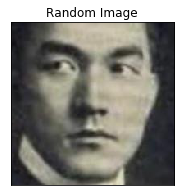

In [8]:
fig = plt.figure(figsize=(3, 3))
rand = np.random.randint(number_to_upload)
ax = plt.imshow(cv2.cvtColor(pictures_list[rand], cv2.COLOR_BGR2RGB))
plt.title('Random Image')
yticks = plt.xticks([]); yticks = plt.yticks([])

#### Getting the target values, which is the `race` of the person

In [9]:
y = [i.split('_')[2] for i in filename_list]

Double checking:

In [10]:
len(y)

5000

Making a dictionary of these values

In [11]:
race_dict = {
             0: 'White',
             1: 'Black',
             2: 'Asian',
             3: 'Indian',
             4: 'Other'
            }

#### Visualizing again, with labels

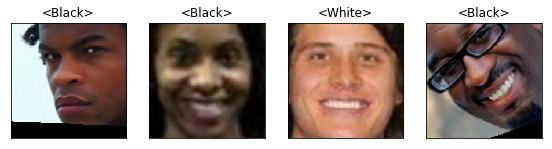

In [12]:
fig = plt.figure(figsize=(12, 12))
for i in range(1, 5):
    plt.subplot(1, 5, i)
    rand = np.random.randint(number_to_upload)
    ax = plt.imshow(cv2.cvtColor(pictures_list[rand], cv2.COLOR_BGR2RGB))
    title = plt.title(('<' + race_dict[int(y[rand])] + '>'))
    yticks = plt.xticks([]); yticks = plt.yticks([])

Some of these are debatable...

#### Scaling and formatting the images

In [13]:
X = np.array(pictures_list).astype(np.float32)

In [14]:
X[0][0][0]

array([0., 0., 0.], dtype=float32)

The scale is wrong!

In [15]:
np.min(X), np.max(X)

(0.0, 255.0)

Scaling between 0 and 1

In [16]:
X = np.divide(X, 255) 

In [20]:
X[np.random.randint(number_to_upload)][0][0]

array([0.30588236, 0.30588236, 0.30588236], dtype=float32)

In [18]:
np.min(X), np.max(X)

(0.0, 1.0)

Better

#### Autoencoder parameters

In [52]:
batch_size = 8
num_cols, num_rows = X.shape[1], X.shape[2]
num_channels = 3
epochs=10

In [22]:
input_img = Input(shape=(num_cols, num_rows, 3)) 

#### Building the neural network

In [23]:
# encoder
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) 
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) 
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) 
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) 
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) 

# decoder
conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
up1 = UpSampling2D((2,2))(conv4) 
conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) 
up2 = UpSampling2D((2,2))(conv5) 
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) 

Instructions for updating:
Colocations handled automatically by placer.


#### Compiling the model

In [24]:
autoencoder = Model(input_img, decoded)

In [25]:
autoencoder.compile(loss='mean_squared_error', 
                    optimizer = RMSprop())

Instructions for updating:
Use tf.cast instead.


#### Model summary

In [26]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       147584    
__________

#### Training the model

In [27]:
autoencoder_train = autoencoder.fit(X, 
                                    X, 
                                    batch_size=batch_size,
                                    epochs=epochs)

Train on 4000 samples, validate on 1000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
4000/4000 [==============================] - 87s 22ms/sample - loss: 0.0201 - val_loss: 0.0130
Epoch 2/10
4000/4000 [==============================] - 74s 18ms/sample - loss: 0.0133 - val_loss: 0.0130
Epoch 3/10
4000/4000 [==============================] - 74s 19ms/sample - loss: 0.0127 - val_loss: 0.0120
Epoch 4/10
4000/4000 [==============================] - 74s 19ms/sample - loss: 0.0125 - val_loss: 0.0125
Epoch 5/10
4000/4000 [==============================] - 74s 19ms/sample - loss: 0.0123 - val_loss: 0.0123
Epoch 6/10
4000/4000 [==============================] - 74s 18ms/sample - loss: 0.0122 - val_loss: 0.0119
Epoch 7/10
4000/4000 [==============================] - 74s 18ms/sample - loss: 0.0121 - val_loss: 0.0123
Epoch 8/10
4000/4000 [==============================] - 74s 18ms/sample - loss: 0.0120 - val_loss: 0.0123
Epoch 9/10
4000/4000 [==============================] - 

##### Plotting the loss

Text(0,0.5,'Loss')

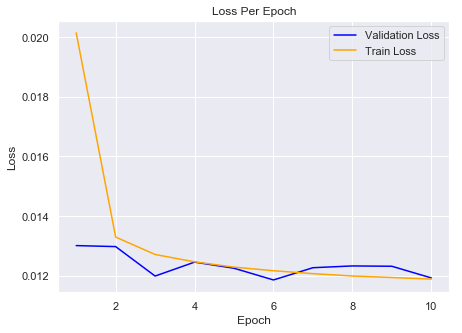

In [65]:
sns.set()
fig = plt.figure(figsize=(7, 5))
plt.plot(1+np.arange(epochs), autoencoder_train.history['val_loss'], c='blue')
plt.plot(1+np.arange(epochs), autoencoder_train.history['loss'], c='orange')
plt.legend(('Validation Loss', 'Train Loss'))
plt.title('Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

#### Making predictions

In [28]:
pred = autoencoder.predict(X)

Test Images


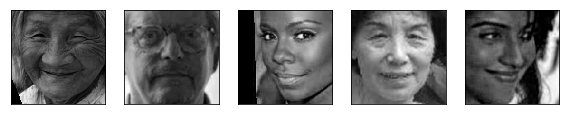

Reconstruction of Test Images


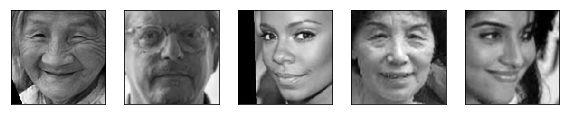

In [33]:
plt.figure(figsize=(20, 5))
print("Test Images")
five_random = np.random.randint(0, number_to_upload, 5)
ix_1, ix_2 = 0, 0
for i in five_random:
    plt.subplot(2, 10, ix_1+1); ix_1+=1
    plt.imshow(X[i, ..., 0], cmap='gray')
    plt.xticks([]); plt.yticks([])
plt.show()
plt.figure(figsize=(20, 5))
print("Reconstruction of Test Images")
for i in five_random:
    plt.subplot(2, 10, ix_2+1); ix_2+=1
    plt.xticks([]); plt.yticks([])
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()

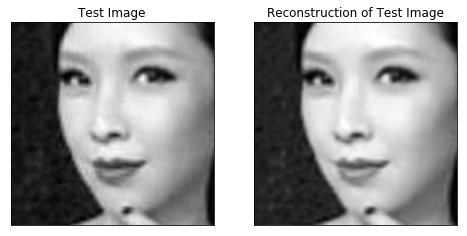

In [47]:
random = np.random.randint(number_to_upload_)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Test Image')
plt.imshow(X[random, ..., 0], cmap='gray')
plt.xticks([]); plt.yticks([])
plt.subplot(1, 2, 2)
plt.title('Reconstruction of Test Image')
plt.xticks([]); plt.yticks([])
plt.imshow(pred[random, ..., 0], cmap='gray')  
plt.show()

This is a nearly perfect reconstruction!

#### Average face of the entire data

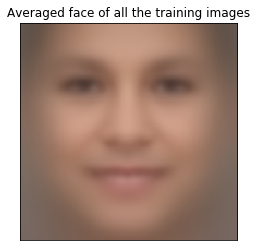

In [50]:
plt.figure(figsize=[4, 4])
plt.imshow(cv2.cvtColor(np.mean(X, axis=0), cv2.COLOR_BGR2RGB))
plt.title('Averaged face of all the training images')
yticks = plt.xticks([]); xticks = plt.yticks([])

That looks like a woman, and she has no imperfections.